# 图像入门
cv.imread()，cv.imshow()，cv.imwrite()

In [1]:
import numpy as np
import cv2 as cv

# 加载彩色灰度图像
img = cv.imread('data/messi5.jpg',0)

In [2]:
# 显示图像
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
# 窗口调节尺寸
cv.namedWindow('image', cv.WINDOW_NORMAL)   
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# 图像打开,显示，保存
import numpy as np
import cv2 as cv
img = cv.imread('data/messi5.jpg',0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:             # 等待ESC退出
    cv.destroyAllWindows()
elif k == ord('s'):     # 等待关键字，保存和退出
    cv.imwrite('data/messigray.png',img)
    cv.destroyAllWindows()

## 使用Matplotlib

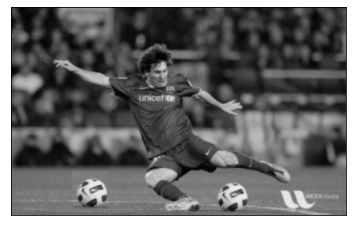

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/messi5.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

# 视频入门
cv.VideoCapture()，cv.VideoWriter()
## 播放视频

In [1]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('data/vtest.avi')     # 'data/vtest.avi'/0-文件/摄像头读取
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # 我们在框架上的操作到这里
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # 显示结果帧e
    cv.imshow('frame', gray)
    key = cv.waitKey(50)        # 50ms每帧 
    if key == ord('q'):
        break
# 完成所有操作后，释放cap
cap.release()
cv.destroyAllWindows()

## 保存视频

In [1]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)   # 摄像头读取

# 定义编解码器并创建VideoWriter对象
fourcc = cv.VideoWriter_fourcc(*'XVID')    # 最常用的格式
# fourcc = cv.VideoWriter_fourcc(*'MJPG')    # 大尺寸视频
# fourcc = cv.VideoWriter_fourcc(*'X264')    # 小尺寸视频

out = cv.VideoWriter('data/output.avi', fourcc, 20.0, (640, 480))  # 要和原视频分辨率一致
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)    # 写翻转的框架
    out.write(frame)             # 保存视频
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# 完成工作后释放所有内容
cap.release()
out.release()
cv.destroyAllWindows()

In [3]:
import numpy as np
import cv2 as cv

fourcc = cv.VideoWriter_fourcc(*'XVID')

cap = cv.VideoCapture('data/vtest.avi')     # 'data/vtest.avi'/0-文件/摄像头读取
if not cap.isOpened():
    print("Cannot open camera")
    exit()
    
out = cv.VideoWriter('D:/CSDN/Jupyter Notebook/gray_vtest.avi', fourcc, 20.0, (640, 480))  # 要和原视频分辨率一致    
    
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # 我们在框架上的操作到这里
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    out.write(gray)
    cv.imshow('frame', gray)
    key = cv.waitKey(10)        # 50ms每帧 
    if key == ord('q'):
        break
        
# 完成所有操作后，释放cap
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


# OpenCV中的绘图功能(略)
cv.line()，cv.circle()，cv.rectangle()，cv.ellipse()，cv.putText()

# 鼠标作为画笔
cv.setMouseCallback()

## 鼠标回调事件

In [8]:
import cv2 as cv

events = [i for i in dir(cv) if 'EVENT' in i]
for event in events:
    print(event)

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP


## 在双击的地方绘制一个圆圈

In [9]:
import numpy as np
import cv2 as cv

# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
        
# 创建一个黑色的图像，一个窗口，并绑定到窗口的功能
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

## 更高级的演示
拖动鼠标来绘制矩形或圆形

In [10]:
import cv2
import numpy as np

drawing=False    # 当鼠标按下时变为True
mode=True        # 如果mode 为true 绘制矩形。按下'm' 变成绘制曲线
ix,iy=-1,-1

# 创建回调函数
def draw_circle_rec(event,x,y,flags,param):
    global ix,iy,drawing,mode
    # 当按下左键是返回起始位置坐标
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix,iy=x,y
    # 当鼠标左键按下并移动是绘制图形。event 可以查看移动，flag 查看是否按下
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        if drawing==True:
            if mode==True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                # 绘制圆圈，小圆点连在一起就成了线，3 代表了笔画的粗细
                cv2.circle(img,(x,y),10,(0,0,255),-1)
                # 下面注释掉的代码是起始点为圆心，起点到终点为半径的
#                 r=int(np.sqrt((x-ix)**2+(y-iy)**2))
#                 cv2.circle(img,(x,y),r,(0,0,255),-1)
    # 原地绘制圆形
    elif event==cv2.EVENT_LBUTTONUP:
        drawing==False
        if mode==True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle_rec)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)
    if k==ord(' '):   # 空格键
        mode=not mode
    elif k==27:
        break
cv2.destroyAllWindows()

# 用滑动条做调色板
cv.getTrackbarPos()，cv.createTrackbar()

In [11]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

img = np.zeros((300,512,3), np.uint8)   # 创建一个黑色的图像
cv.namedWindow('image')

# 创建颜色变化的滑动条
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# 'B'-滑动条名称,窗口名,数值范围,绑定函数

# 为 ON/OFF 功能创建开关
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1)
    if k == 27:
        break
        
    # 返回四条滑动条的当前位置(整型数)
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    # switch-滑动条名称,窗口名
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]   # numpy的赋值(对应3通道)
        
cv.destroyAllWindows()